# **Exploratory Data Analysis of Dubai Real Estate Data**

In [92]:
# Importation of Python Modules
import pandas as pd
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb



In [48]:
rent_data = pd.read_csv("./rents.csv")

**Exploration of Rent Data**

In [4]:

rent_data

,REGISTRATION_DATE,START_DATE,END_DATE,VERSION_EN,AREA_EN,CONTRACT_AMOUNT,ANNUAL_AMOUNT,IS_FREE_HOLD_EN,ACTUAL_AREA,PROP_TYPE_EN,PROP_SUB_TYPE_EN,ROOMS,USAGE_EN,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,PARKING,TOTAL_PROPERTIES,MASTER_PROJECT_EN,PROJECT_EN
0,2025-01-01 00:46:39,2025-01-31 00:00:00,2026-01-30 00:00:00,Renewed,Al Karama,59000.0,59000.00,Non Free Hold,83.60,Unit,Flat,NaN,Residential,ADCB Metro Station,Dubai Mall,Burj Khalifa,NaN,1,NaN,NaN
1,2025-01-01 02:47:08,2025-01-04 00:00:00,2026-01-03 00:00:00,Renewed,Burj Khalifa,50000.0,50000.00,Free Hold,84.27,Unit,Flat,NaN,Residential,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,NaN,1,NaN,UPPER CREST
2,2025-01-01 05:09:30,2025-01-31 00:00:00,2026-01-30 00:00:00,Renewed,Al Saffa First,68000.0,68000.00,Non Free Hold,80.36,Unit,Flat,NaN,Residential,Business Bay Metro Station,Dubai Mall,Burj Khalifa,NaN,1,NaN,NaN
3,2025-01-01 06:27:45,2025-01-10 00:00:00,2026-01-09 00:00:00,Renewed,Ras Al Khor Industrial Third,43050.0,43050.00,Non Free Hold,78.76,Unit,Flat,NaN,Residential,Creek Metro Station,City Centre Mirdif,Dubai International Airport,NaN,1,NaN,NaN
4,2025-01-01 06:37:20,2025-01-05 00:00:00,2026-01-04 00:00:00,Renewed,Ras Al Khor Industrial Third,36179.0,36179.00,Non Free Hold,57.41,Unit,Flat,NaN,Residential,Rashidiya Metro Station,City Centre Mirdif,Dubai International Airport,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,2025-01-09 16:25:13,2025-01-09 00:00:00,2026-01-08 00:00:00,New,Saih Shuaib 2,20000.0,20000.00,Free Hold,25.00,Unit,Office,NaN,Commercial,NaN,NaN,Al Makhtoum International Airport,NaN,1,NaN,NaN
26392,2025-01-09 16:25:15,2024-10-31 00:00:00,2025-10-30 00:00:00,Renewed,Nadd Hessa,63525.0,63525.00,Free Hold,140.62,Unit,Flat,NaN,Residential,NaN,NaN,IMG World Adventures,NaN,1,NaN,NaN
26393,2025-01-09 16:25:29,2025-01-16 00:00:00,2025-12-31 00:00:00,New,Naif,44323.0,46185.31,Non Free Hold,85.00,Unit,Flat,NaN,Residential,Baniyas Square Metro Station,Dubai Mall,Dubai International Airport,NaN,1,NaN,NaN
26394,2025-01-09 16:25:31,2025-01-10 00:00:00,2026-01-09 00:00:00,Renewed,Wadi Al Safa 5,41745.0,41745.00,Free Hold,68.99,Unit,Flat,NaN,Residential,NaN,NaN,IMG World Adventures,NaN,1,NaN,NaN


In [5]:
rent_data_description = pd.read_csv("./rent_description.csv")
rent_data_description

,Field name,Description,Type
0,Ejari Contract Number,NaN,Integer
1,Registration Date,Date of registration,Date & Time
2,Start Date,Start date of the rental,Date & Time
3,End Date,End date of the rental,Date & Time
4,Property ID,NaN,Integer
5,Version,NaN,String
6,Area1,Dubaï area,String
7,Contract Amount,contract amount in AED,Float
8,Annual Amount,annual amount in AED,Float
9,Is Free Hold?,NaN,String


**The Rent Data DataSet Is a dataset representing rent data from 1st January,2025 to 26th January 2025**

# **Hypothesis for Exploration of Rent Data**
From the exploratory data analysis of Rent Data, we are going to compare the relationships between the Metrics of the data sets to draw business oriented insights which can be used in making business decisions.


In [6]:
#Length of Data set
# print(rent_data.columns)
rent_data = rent_data.drop(columns=['REGISTRATION_DATE', 'START_DATE', 'END_DATE','VERSION_EN','ROOMS','PARKING','MASTER_PROJECT_EN'])
rent_data

,AREA_EN,CONTRACT_AMOUNT,ANNUAL_AMOUNT,IS_FREE_HOLD_EN,ACTUAL_AREA,PROP_TYPE_EN,PROP_SUB_TYPE_EN,USAGE_EN,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_PROPERTIES,PROJECT_EN
0,Al Karama,59000.0,59000.00,Non Free Hold,83.60,Unit,Flat,Residential,ADCB Metro Station,Dubai Mall,Burj Khalifa,1,NaN
1,Burj Khalifa,50000.0,50000.00,Free Hold,84.27,Unit,Flat,Residential,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,1,UPPER CREST
2,Al Saffa First,68000.0,68000.00,Non Free Hold,80.36,Unit,Flat,Residential,Business Bay Metro Station,Dubai Mall,Burj Khalifa,1,NaN
3,Ras Al Khor Industrial Third,43050.0,43050.00,Non Free Hold,78.76,Unit,Flat,Residential,Creek Metro Station,City Centre Mirdif,Dubai International Airport,1,NaN
4,Ras Al Khor Industrial Third,36179.0,36179.00,Non Free Hold,57.41,Unit,Flat,Residential,Rashidiya Metro Station,City Centre Mirdif,Dubai International Airport,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,Saih Shuaib 2,20000.0,20000.00,Free Hold,25.00,Unit,Office,Commercial,NaN,NaN,Al Makhtoum International Airport,1,NaN
26392,Nadd Hessa,63525.0,63525.00,Free Hold,140.62,Unit,Flat,Residential,NaN,NaN,IMG World Adventures,1,NaN
26393,Naif,44323.0,46185.31,Non Free Hold,85.00,Unit,Flat,Residential,Baniyas Square Metro Station,Dubai Mall,Dubai International Airport,1,NaN
26394,Wadi Al Safa 5,41745.0,41745.00,Free Hold,68.99,Unit,Flat,Residential,NaN,NaN,IMG World Adventures,1,NaN


# **A Report on the Total Amount in AED going to different regions in Area 1(Dubai Areas)**

In [7]:
Dubai_Areas = list(rent_data['AREA_EN'].unique())
Total_Amounts = list(rent_data.groupby(['AREA_EN'])['CONTRACT_AMOUNT'].sum())
Total_Amounts_in_Billion = [amount / 1000000000 for amount in Total_Amounts]
# print(Dubai_Areas)
# print(len(Dubai_Areas))
# print(len(Total_Amounts))

area_contract_data = pd.DataFrame({
    'Area': Dubai_Areas,
    'Total_Contract_Amount': Total_Amounts_in_Billion
})
top_10_cities = area_contract_data.sort_values(by='Total_Contract_Amount', ascending=False).head(10)



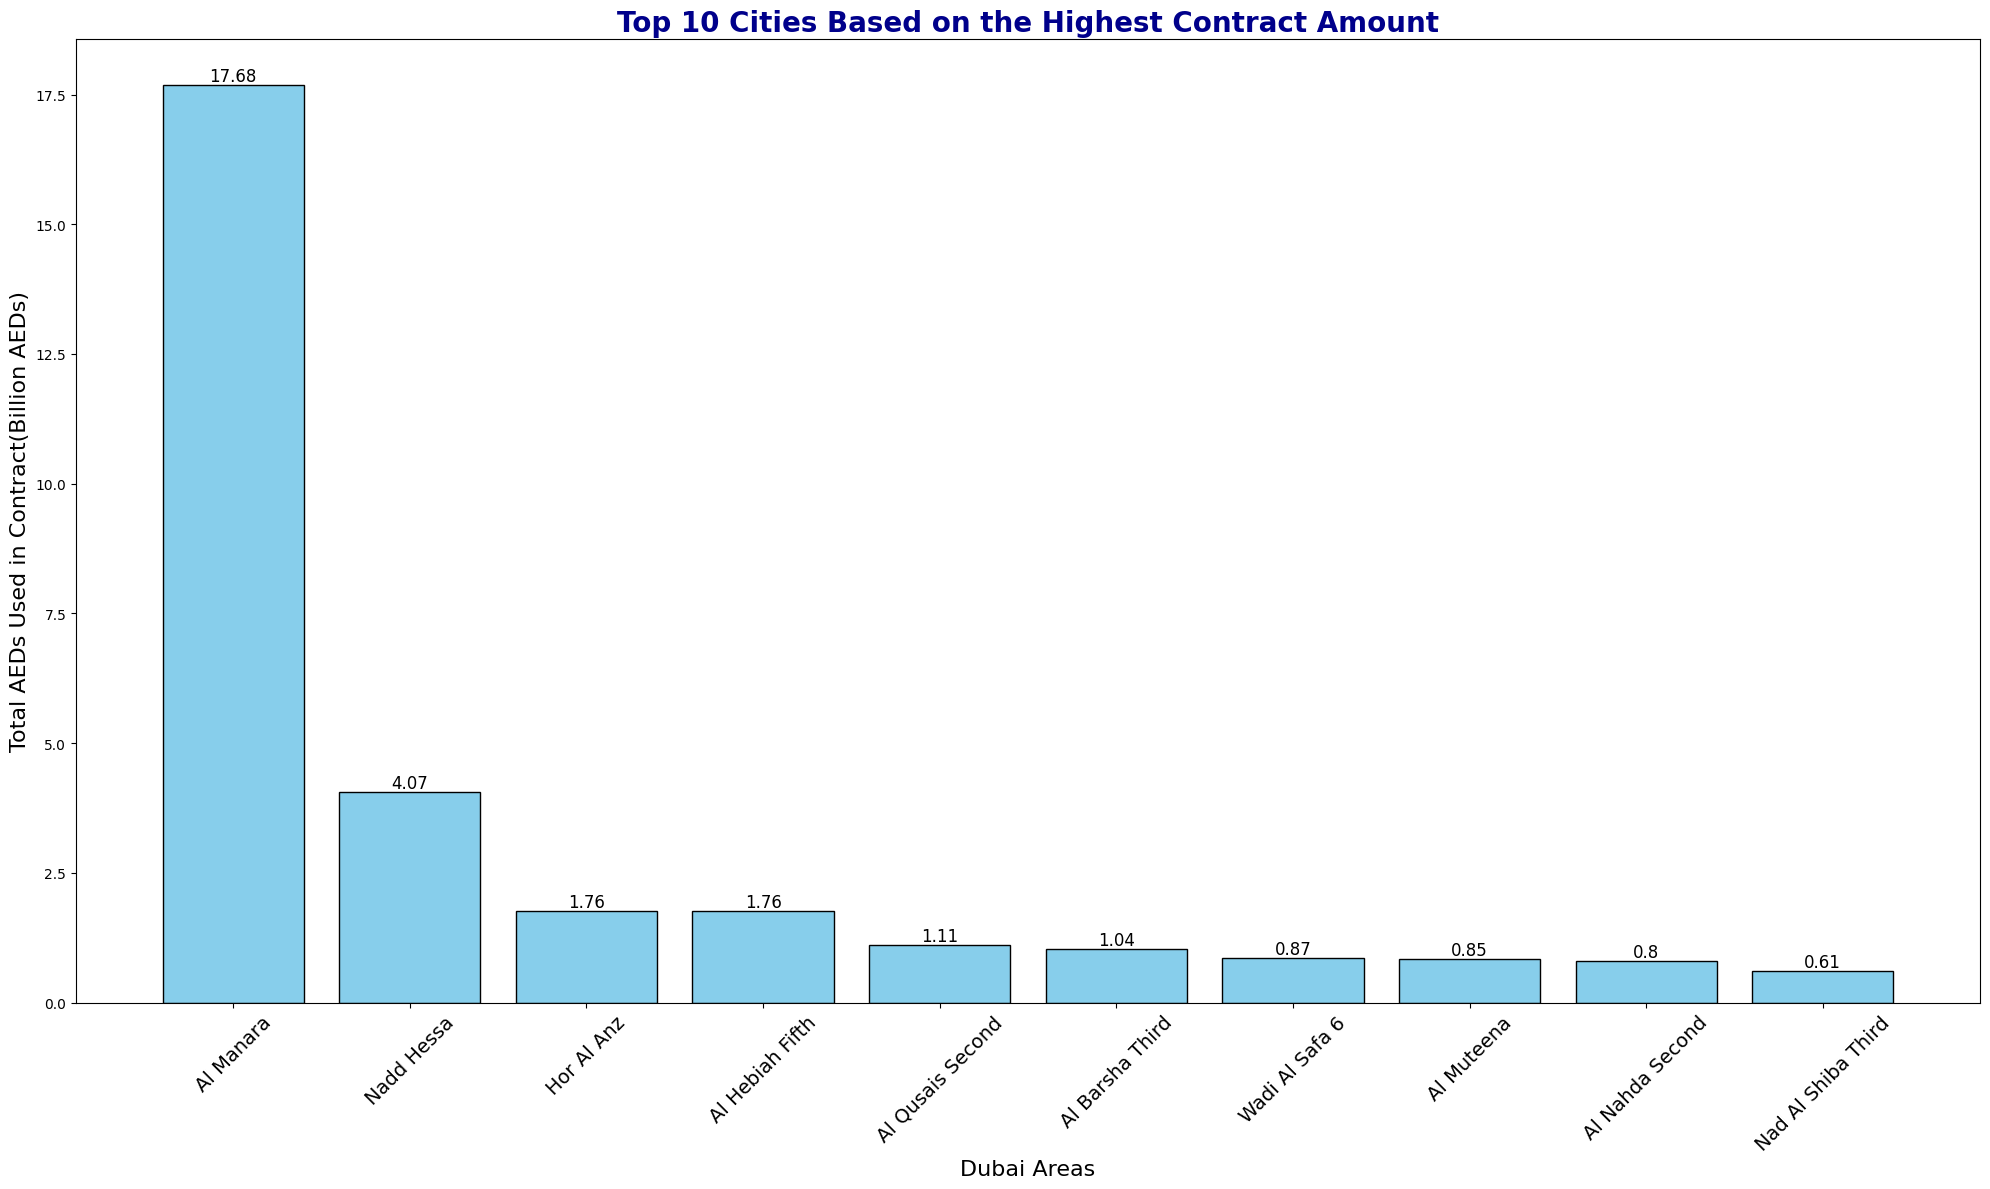

In [ ]:
plt.figure(figsize=(20, 12))
plt.bar(top_10_cities["Area"], top_10_cities["Total_Contract_Amount"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('Dubai Areas',fontsize=16)
plt.ylabel('Total AEDs Used in Contract(Billion AEDs)',fontsize=16)
plt.title('Bar Chart between X and Y Metrics')

plt.title('Top 10 Cities Based on the Highest Contract Amount', fontsize=20, fontweight='bold', color='darkblue', loc='center')


# Bar Numbering
for index, value in enumerate(top_10_cities["Total_Contract_Amount"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **A Report on the Total Amount in AED going to different Property Types**

In [10]:

Property_types = list(rent_data['PROP_TYPE_EN'].unique())
Mean_Amounts = list(rent_data.groupby(['PROP_TYPE_EN'])['CONTRACT_AMOUNT'].mean())
Total_Amounts = list(rent_data.groupby(['PROP_TYPE_EN'])['CONTRACT_AMOUNT'].sum())
Total_Amounts_in_Billion = [amount / 1000000000 for amount in Total_Amounts]
Mean_Amounts_in_Million = [amount/1000000 for amount in Mean_Amounts]

property_contract_data = pd.DataFrame({
    'Property_Type': Property_types,
    'Mean_Amounts': Mean_Amounts_in_Million,
    'Total_Contract_Amount': Total_Amounts_in_Billion
})
# property_contract_data

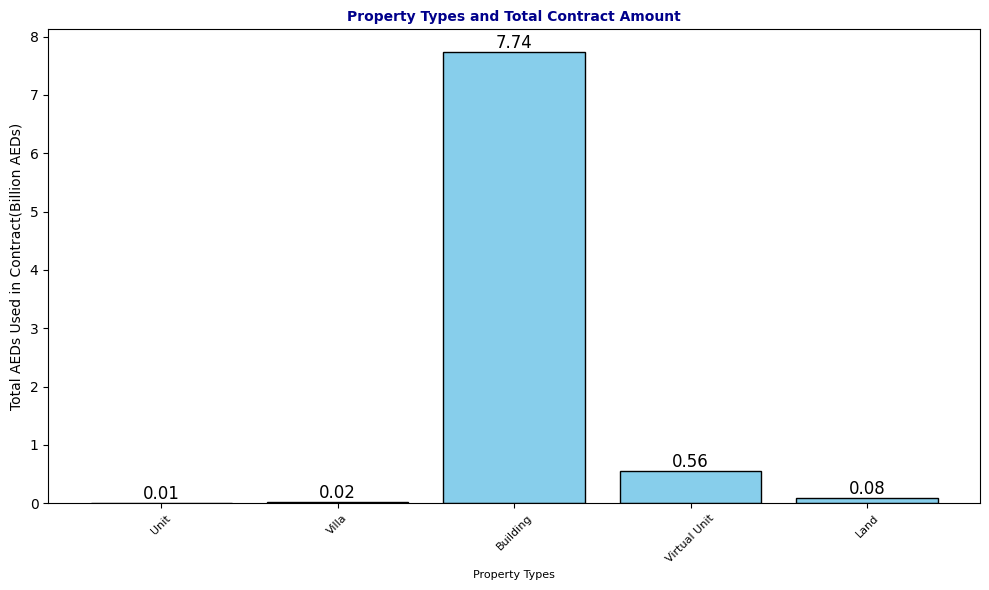

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(property_contract_data["Property_Type"], property_contract_data["Total_Contract_Amount"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Property Types',fontsize=8)
plt.ylabel('Total AEDs Used in Contract(Billion AEDs)',fontsize=10)

plt.title('Property Types and Total Contract Amount', fontsize=10, fontweight='bold', color='darkblue', loc='center')


# Bar Numbering
for index, value in enumerate(property_contract_data["Total_Contract_Amount"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

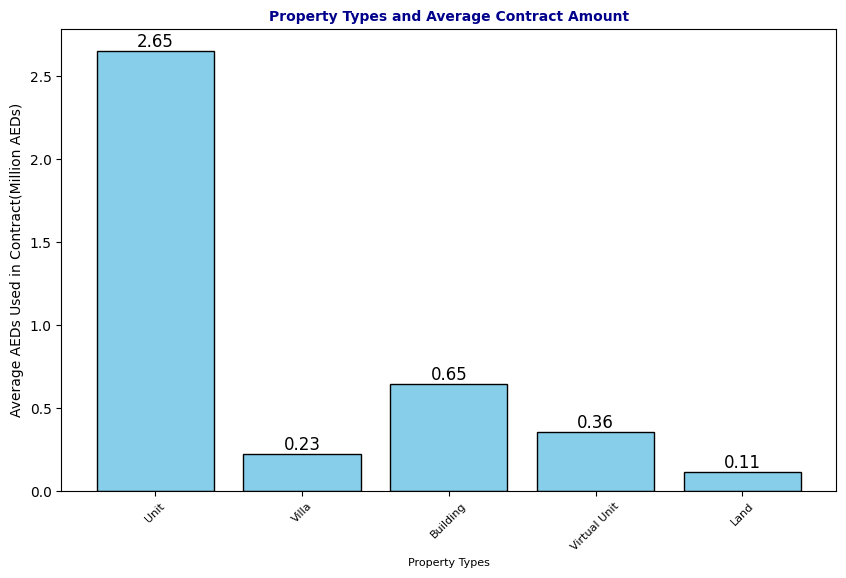

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(property_contract_data["Property_Type"], property_contract_data["Mean_Amounts"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Property Types',fontsize=8)
plt.ylabel('Average AEDs Used in Contract(Million AEDs)',fontsize=10)

plt.title('Property Types and Average Contract Amount', fontsize=10, fontweight='bold', color='darkblue', loc='center')


# Bar Numbering
for index, value in enumerate(property_contract_data["Mean_Amounts"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Show the plot

plt.show()

In [ ]:
prop_sub_dataset = rent_data[['PROP_SUB_TYPE_EN','CONTRACT_AMOUNT','TOTAL_PROPERTIES']]
# prop_sub_dataset = prop_sub_dataset.dropna(axis=0,how="any")
property_sub_types = list(prop_sub_dataset['PROP_SUB_TYPE_EN'].unique())
Total_Amounts = list(prop_sub_dataset.groupby(['PROP_SUB_TYPE_EN'])['CONTRACT_AMOUNT'].sum())
Total_properties = list(prop_sub_dataset.groupby(['PROP_SUB_TYPE_EN'])['TOTAL_PROPERTIES'].sum())
Mean_Amounts = [total_amount/total_properties for total_amount,total_properties in zip(Total_Amounts,Total_properties)]

# property_subtype_data = pd.DataFrame({
#     'Property_Sub_Type': property_sub_types,
#     'Mean_Amounts': Mean_Amounts,
#     'Total_Contract_Amount': Total_Amounts,
# })

# print(len(Property_sub_types),

prop_dataset = prop_sub_dataset.groupby(['PROP_SUB_TYPE_EN']).agg({'CONTRACT_AMOUNT': 'sum', 'TOTAL_PROPERTIES': 'sum'}).reset_index()
prop_dataset['Mean_Amounts'] = prop_dataset['CONTRACT_AMOUNT'] / prop_dataset['TOTAL_PROPERTIES']

frequent_property_types = prop_dataset.sort_values(by='TOTAL_PROPERTIES', ascending=False).head(10)
frequent_property_types

,PROP_SUB_TYPE_EN,CONTRACT_AMOUNT,TOTAL_PROPERTIES,Mean_Amounts
20,Labor Camps,2.118810e+10,529398,40022.998768
12,Flat,1.892856e+10,136450,138721.600341
17,Hotel,4.525000e+09,45600,99232.453509
25,Office,2.833240e+09,16339,173403.489763
36,Shop,3.523824e+09,16259,216730.666343
18,Hotel apartments,9.000000e+06,8190,1098.901099
46,Villa,1.536811e+09,7490,205181.725441
48,Warehouse,2.613017e+08,1375,190037.630909
43,Studio,2.968310e+07,720,41226.531278
37,Showroom,2.353203e+08,556,423237.921853


# **A Report on the Total Amont of Money VS Usage on Dubai Real Estate Rent Data**

# **Hypothesis For Exploration of Transaction Data of Dubai Real Estate**
In this section we are going to carry out some exploration data analysis on the relationships between different Metrics on the The Transaction data.

In [12]:
transaction_data = pd.read_csv("./transactions.csv")
transaction_description = pd.read_csv("./transaction_description.csv")
transaction_description

,Field name,Description,Type
0,Transaction Number,NaN,String
1,Transaction Date,Date and time of the transaction,Date & Time
2,Property ID,NaN,Integer
3,Transaction Type,"Type of transaction (Sales, Gifts, Mortgage)",String
4,Transaction sub type,Sub type of the transaction (Sell - Pre regist...,String
5,Registration type,"Type of registration (Ready, Off-Plan)",String
6,Is Free Hold?,NaN,String
7,Usage,"Usage (Commercial, Residential)",String
8,Area,Dubaï area,String
9,Property Type,"Type of property (Unit, Land, Building)",String


In [13]:
transaction_data

,TRANSACTION_NUMBER,INSTANCE_DATE,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,AREA_EN,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN
0,102-1-2025,2025-01-07 15:57:40,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Wadi Al Safa 4,Unit,Flat,...,68.67,1 B/R,1,NaN,NaN,NaN,1,1,NaN,Lacina
1,102-10-2025,2025-01-02 08:23:00,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,DUBAI SCIENCE PARK,Unit,Flat,...,47.25,Studio,1,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Motor City,1,1,NaN,Binghatti Hills
2,102-100-2025,2025-01-02 15:18:51,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,AL FURJAN,Unit,Hotel Apartment,...,32.35,Studio,1,ENERGY Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,1,NaN,AZIZI JEWEL
3,102-1000-2025,2025-01-08 11:02:57,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Wadi Al Safa 5,Unit,Flat,...,259.03,2 B/R,2,NaN,NaN,NaN,1,1,NaN,Verdes by Haven 1
4,102-100058-2024,2025-01-25 14:16:04,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,30.27,Studio,1,Damac Properties,Marina Mall,Sports City Swimming Academy,1,1,NaN,RED SQUARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14531,93-1-2025,2025-01-13 12:08:06,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,87.61,1 B/R,G-62,NaN,City Centre Mirdif,NaN,1,1,NaN,TOPAZ RESIDENCES 2
14532,95-1-2025,2025-01-07 14:29:17,Sales,Delayed Development,Ready,Non Free Hold,Residential,DUBAI INVESTMENT PARK SECOND,Unit,Flat,...,143.11,2 B/R,15-3B-22,NaN,NaN,Expo 2020 Site,0,0,NaN,RITAJ
14533,95-2-2025,2025-01-07 21:48:47,Sales,Delayed Development,Ready,Non Free Hold,Residential,DUBAI INVESTMENT PARK SECOND,Unit,Flat,...,41.81,Studio,14GB25,NaN,NaN,Expo 2020 Site,0,0,NaN,RITAJ
14534,95-3-2025,2025-01-14 12:14:16,Sales,Delayed Development,Ready,Non Free Hold,Residential,DUBAI INVESTMENT PARK SECOND,Unit,Flat,...,45.51,Studio,14GA24,NaN,NaN,Expo 2020 Site,0,0,NaN,RITAJ


# **Correlation of Contract Amount and Other datasets**

The following will show the correlation between contract amount and other data features

                 CONTRACT_AMOUNT  ACTUAL_AREA
CONTRACT_AMOUNT         1.000000     0.001164
ACTUAL_AREA             0.001164     1.000000


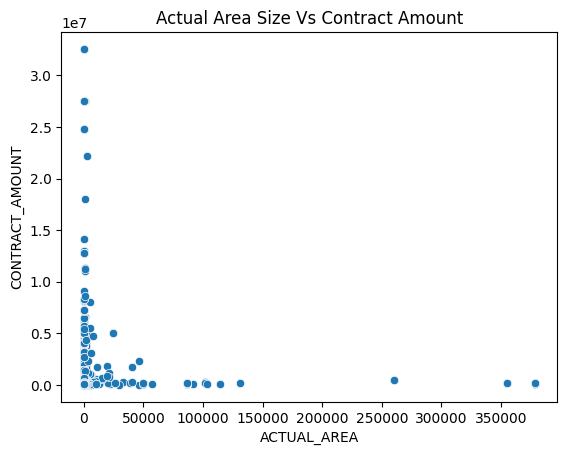

In [21]:
# print(rent_data.columns)
correlation_matrix = rent_data[['CONTRACT_AMOUNT','ACTUAL_AREA']].corr()
print(correlation_matrix)

#Visualize Correlation
sns.scatterplot(data=rent_data, x='ACTUAL_AREA', y='CONTRACT_AMOUNT')
plt.title("Actual Area Size Vs Contract Amount")
plt.show()


In [ ]:
correlation_matrix_transactions = transaction_data.corr()
correlation_matrix_transactions

# **Prediciting Property Contract Amount using Regressional Model**
We are going to use the regressional model to predict contract prices of the Dubai Real State Dataset.

**The Data Set Features used will Contract amount as Y against X features such as:**

1. Area - Dubai Area as **Area Score** - ```area_score```
2. Property Type 1 as **Property Score** - ```property_score```
3. Property Type 2 as **Property Sub Score** - ```property_sub_scroe```
4. Propety Size as **Property Size**  - ```property_size```
4. Number of Rooms as **Room Number** - ```room_score```
5. Usage of Property as **Usage Score** - ```usage_score```
6. Nearest Metro as **Nearest Metro Score** - ```nearest_metro_score```
7. Nearest Mall as **Nearest Mall Score** - ```nearest_mall_score```
8. Nearest Landmark as **Nearest LandMark Score** - ```nearest_landmark_score```


In [69]:
#Encoding datasets

categorical_columns = ['PROJECT_EN','AREA_EN', 'PROP_TYPE_EN', 'PROP_SUB_TYPE_EN', 'USAGE_EN', 'NEAREST_METRO_EN', 'NEAREST_MALL_EN', 'NEAREST_LANDMARK_EN']
numerical_columns = ['ACTUAL_AREA', 'ROOMS', 'PROPERTY_SIZE', 'CONTRACT_AMOUNT','ANNUAL_AMOUNT']


# rent_data = rent_data.drop(columns=['REGISTRATION_DATE', 'START_DATE', 'END_DATE','VERSION_EN','ROOMS','PARKING','MASTER_PROJECT_EN'])
rent_data = rent_data.dropna(axis=0, how='any')
for i in categorical_columns:
  rent_data[i] = rent_data[i].astype('category')
  rent_data[i] = rent_data[i].cat.codes

rent_data



,AREA_EN,CONTRACT_AMOUNT,ANNUAL_AMOUNT,IS_FREE_HOLD_EN,ACTUAL_AREA,PROP_TYPE_EN,PROP_SUB_TYPE_EN,USAGE_EN,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_PROPERTIES,PROJECT_EN
1,21,50000.0,50000.0,Free Hold,84.27,0,1,1,5,1,2,1,858
13,15,170000.0,170000.0,Free Hold,206.00,1,14,1,9,4,8,1,338
15,24,235000.0,235000.0,Free Hold,281.96,1,14,1,27,3,6,1,253
16,24,235000.0,235000.0,Free Hold,281.96,1,14,1,27,3,6,1,253
17,15,205000.0,205000.0,Free Hold,358.00,1,14,1,26,4,8,1,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82842,2,67200.0,67200.0,Free Hold,51.62,0,1,1,10,3,8,1,215
82844,2,67200.0,67200.0,Free Hold,50.36,0,1,1,10,3,8,1,215
82847,2,67200.0,67200.0,Free Hold,59.81,0,1,1,10,3,8,1,215
82849,2,67200.0,67200.0,Free Hold,58.29,0,1,1,10,3,8,1,215


In [71]:
# Getting a sampled dataset

# sample_rent_data = rent_data.sample(frac=0.2, random_state=42)
# sample_rent_data

,AREA_EN,CONTRACT_AMOUNT,ANNUAL_AMOUNT,IS_FREE_HOLD_EN,ACTUAL_AREA,PROP_TYPE_EN,PROP_SUB_TYPE_EN,USAGE_EN,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_PROPERTIES,PROJECT_EN
1115,22,210000.0,210000.00,Free Hold,127.00,0,4,0,6,1,2,2,813
74345,4,36300.0,36300.00,Free Hold,36.53,0,12,1,30,3,7,1,321
10632,16,42000.0,42000.00,Free Hold,37.81,0,8,0,21,4,8,1,468
24277,22,108000.0,108000.00,Free Hold,93.00,0,1,1,6,1,2,1,795
50040,26,34177.5,34177.50,Free Hold,36.00,0,1,1,18,2,4,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77939,7,27600.0,27600.00,Free Hold,40.00,0,1,1,26,4,8,1,311
70970,10,88730.0,84852.34,Free Hold,64.22,0,1,1,7,0,3,1,268
66760,10,150000.0,150000.00,Free Hold,100.03,0,1,1,7,0,3,1,264
66725,10,120000.0,120000.00,Free Hold,81.00,0,1,1,7,0,3,1,266


# **Training Using XGBoost Model on Rent Data**

In [97]:

# Splitting data into features and target
X = rent_data.drop(['IS_FREE_HOLD_EN','CONTRACT_AMOUNT'], axis=1)
y = rent_data['CONTRACT_AMOUNT']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting Data to DMatrix format
d_train=xgb.DMatrix(X_train,label=y_train)
d_test=xgb.DMatrix(X_test,label=y_test)

#Setting XGboost Parameters
# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'eval_metric': 'rmse',            # Root Mean Squared Error
    'learning_rate': 0.1,
    'max_depth': 6,
    # 'n_estimators': 100
}


#Training Model
model = xgb.train(params, d_train, num_boost_round=100)


#predict
y_pred = model.predict(d_test)

# print(y_pred)


#Evaluate Model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean absolute Error: 26759.75964827675
Mean Squared Error: 34410116469.657906
Root Mean Squared Error: 185499.64007959128
R-squared: 0.9631808603249911
